# CSCI-P556
## Assignment 1
### Due date: 5:30PM, September 26, 2018


---



## Question 1: Binary Classification (35 points)

Consider the binary classification problem of mapping a given input to two classes. Let $\mathcal{X}=\mathbb{R}^d$ and $\mathcal{Y}=\{+1, -1\}$ be the input space and output space, respectively. In simple words, it means that the input has $d$ features and all of them are real valued, whereas the output can only take values $-1$ or $+1$. This is one of the most common problems in machine learning and many sophisticated methods exist to solve it. In the question, we will solve it using the concepts we have already learned in class. Like we did in linear regression, let us assume the two sets of points can be separated using a straight line i.e. the samples are linearly separable. So if $d=2$, one should be able to draw a line to distinguish between the two classes. All points lying on side of the line should belong to a particular class (say $1$) and the points lying on the other side should belong to another class (say $2$). To see what this would look like,  your first task is as follows:

### Task 1
Write a function that will randomly generate a dataset for this problem. Your function should randomly choose a line $l$, which can be denoted as $ax + by + c = 0$. According to basic high school geometry, the line divides the plane into two sides. On one side, $ax+by+c>0$ while on the other $ax+by+c<0$. Use this fact to randomly generate $k_0$ points on the side of class 0 and $k_1$ points on the side of class 1. Use the function you wrote in the previous assignment to plot this dataset!

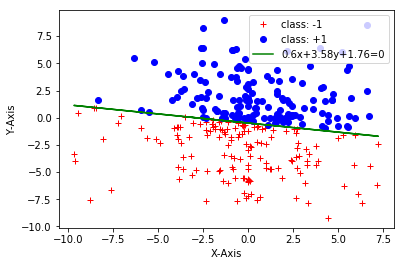

In [145]:
# def generate_dataset(k0, k1):
#   """
#   Your code for generating the dataset goes here! The output should X and y.
#   You should call the visualization function from this function. Every time we 
#   run this cell, it should plot a new dataset along with the line which was used
#   to generate that dataset. We will test this by changing the values of k and
#   running the cell multiple times
#   Input: k0 = number
#           k1 = number
#   Output: X = An (m x d) dimension numpy array where m is the number of samples and d is the number of features
#           y = (m x 1) dimension vector where m is the number of samples
#   """
  
#   pass
####### We are asked to use past assignments function to visualize, so I used that function here
import matplotlib.pyplot as plt
import numpy as np
from random import randrange
from random import uniform
from random import random
from random import randint
# i have used randrange, uniform , random and randint from random 
# Here is the visualization function that was asked. It takes as input 3 parameters.
# First is set of tuples, second is also set of tuples and third is the values of parameters a , b and c . They are optional to pass.
def plotLineAndPoints(l1, l2,*coefficient):
    lxcord=[]
    lycord=[]
    xlater=[]
    ylater=[]
    for x,y in l1:
        lxcord.append(x)
        xlater.append(x)
        lycord.append(y)
    plt.plot(lxcord,lycord,'r+',color='red',label="class: -1")
    lxcord=[]
    lycord=[]
    for x,y in l2:
        lxcord.append(x)
        xlater.append(x)
        lycord.append(y)
    plt.plot(lxcord,lycord,'o',color='blue',label="class: +1")
    plt.xlabel("X-Axis")
    plt.ylabel("Y-Axis")
    if(len(coefficient)==0):
        pass
    else:
        for i in coefficient:
            a,b,c=i
            for i in xlater:
                ylater.append((-c-a*i)/b)
            plt.plot(xlater,ylater,label="{}x+{}y+{}=0".format(a,b,c),color='green')
    plt.legend()
    pass

# supposed class 0 is ax+by+c<0 and class 1 as ax+by+c>0
def generate_dataset(k0, k1):
    X=[]
    y=[]
#     This allocation to a,b,c is in such a way that it will be random float number. It works like 
# random() will generate values between 0 and 1, while randint(1,20) generates number between 1 and 20 
# we multiply these two TO GET RANDOM FLOAT NUMBER(which was asked to generate)
    a=round(random()*randint(1,20),2)
    b=round(random()*randint(1,20),2)
    c=round(random()*randint(1,20),2)
    X=[]
    y=[]
    xpointsclass1=[]
    xpointsclass0=[]
    ypointsclass1=[]
    ypointsclass0=[]
    class1pointer=0
    class0pointer=0
    for i in range(0,2):
        X.append(random()*randint(-50,50))
    for i in X:
        y.append((-c-a*i)/b)
    xmin=min(X)
    xmax=max(X)
    ymin=min(y)
    ymax=max(y)
    xtobepassed=[]
    ytobepassed=[]
    Xtuple=[]
    yclassification=[]
    while(class0pointer<k0 or class1pointer<k1):
        xpoint=random()*randrange(-10,10)
        ypoint=random()*randrange(-10,10)
        if(a*xpoint+b*ypoint+c<0 and class0pointer<k0):
            xpointsclass0.append(xpoint)
            ypointsclass0.append(ypoint)
            class0pointer=class0pointer+1
            Xtuple.append((xpoint,ypoint))
            yclassification.append(-1)
        if(a*xpoint+b*ypoint+c>0 and class1pointer<k1):
            xpointsclass1.append(xpoint)
            ypointsclass1.append(ypoint)
            class1pointer=class1pointer+1
            Xtuple.append((xpoint,ypoint))
            yclassification.append(+1)
    class0listoftuples=list(zip(xpointsclass0,ypointsclass0))
    class1listoftuples=list(zip(xpointsclass1,ypointsclass1))
    plotLineAndPoints(class0listoftuples,class1listoftuples,(a,b,c))
    X=Xtuple
    y=np.array(yclassification)
    return (X,y)
# First value returned : X will be an array that will be containing tuples of (x,y) coordinates of point
# Second value returned : y will be +1 or -1 as it would be correctly classification class of +1 or -1.

X,y=generate_dataset(150,150)

# To get as many points pass arguments here

### Task 2

When you are given a dataset for which you do not have access the the target function $f$ which maps $\mathcal{X}$ to $\mathcal{Y}$. You learn it from the data. In this problem, it is akin to learning the parameters of the line that separates the two classes. The same line above can be represented as $$\sum_{i=0}^d w_i x_i = 0$$
Notice that $i$ starts from $0$, instead of $1$. Can you think of why?

The goal here is to correctly find out $\bf{w}$. The algorithm to find it is a simple iterative process. 
1. Randomly choose a $w$ to begin with.
2. Keep on adjusting the value of $\bf{w}$ as follows until all data samples are correctly classified:
3. Randomly choose a sample from the dataset and see if it is correctly classified. If yes,  move on to another sample.
4. If not,  then  update the weights as $\mathbf{w}^{t+1} = \mathbf{w}^t + y \cdot \mathbf{x}$ , where 
    *   $\mathbf{w}^{t+1}$ is value of $\mathbf{w}$ at iteration $t+1$
    *   $\mathbf{w}^{t}$ is value of $\mathbf{w}$ at iteration $t$
    *  $y$ is the class label for the sample under consideration
    * $\mathbf{x}$ is the data-point under consideration
    
    
Write a function that implements this learning algorithm. The input to the function is going to be a dataset represented by the input variable $X$ and the target variable $y$. The output of the function should be the chosen $\mathbf{w}$.





1.6148425957023471
9.604103217867547
4.0


array([1.6148426 , 9.60410322, 4.        ])

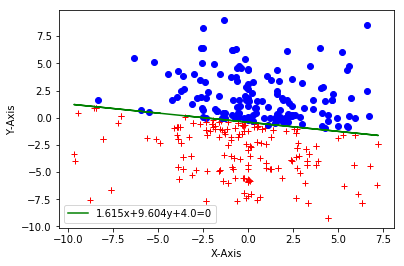

In [148]:
import random
%matplotlib inline
import matplotlib.pyplot as plt
def fit(X, y):
#     print(len(X[0]))
    w=np.zeros(len(X[0])+1)
    length=len(y)
    usedX=[]
    dummyX=X.copy()
    counter=0
    while(counter<=length-1):
        elementindex=random.randint(0,len(y)-1)
        p=random.choice(X)
        idx = X.index(p)
#         print("index of element : ",elementindex)
        if(p not in usedX):
            pdash=list(p)
            pdash.append(1)
            pdashdash=np.array(pdash)
#             print("pdash is : ",pdash)
#             print("pdashdash is :",pdashdash)
            if(pdashdash.dot(w)>=0):
                if(y[idx]==1):
#                     print("success")
                    counter=counter+1
#                     print("counter updated")
                    usedX.append(p)
                    dummyX.remove(p)
                else:
                    w=w+pdashdash*y[idx]
#             if(pdashdash.dot(w)<0):
            else:
                if(y[idx]<0):
#                     print("success")
                    counter=counter+1
#                     print("counter updated")
                    usedX.append(p)
                    dummyX.remove(p)
                else:
                    w=w+pdashdash*y[idx]
# VISUALIZATION PART : Here we simply check if y[i]==+1 or -1. If it is +1 then point the corresponding point from X[i]
# in the blue point and if its -1 then plot corresponding point from X[i] in the red portion . NOTE : This plotting of 
# all blue and red points is according to original dataset that we received from the previous function. All points which are blue 
# were originally blue and those which are red were originally red and ""I havent plotted them as per my new line"". 

# PLotting of points goes here. 
    i=0
    xlater=[]
    ylater=[]
    for i in range(0,len(y)-1):
        if(y[i]==+1) :       
            p,q=X[i]
#             print(p)
#             print("   ",q)
#             print(y[i],"\n")
            i=i+1 
            plt.plot(p,q,'o',color="blue")
            xlater.append(p)
            
        if(y[i]==-1) :       
            p,q=X[i]
#             print(p)
#             print("   ",q)
#             print(y[i],"\n")
            i=i+1 
            plt.plot(p,q,'+',color="red")
            xlater.append(p)
#     print("length of w :",len(w))
    ii=0
#     NOTE:   Here I needed to take the w[0],w[1] and w[3] as we cannot plot data points for higher dimensions other than this.
# Thus , my funciton to classify works correctly for any number of dimensions , but for the sake of plotting I have taken for 
# granted that we will plot points only that can be fitted in two dimenions. BUT YESSS , THE CLASSIFICATION WORKS FOR HIGHER DIMENSIONS


# PLOTTING OF LINE GOES HERE
    for ii in range(len(w)):
        print(w[ii])
#     print("w is ", w)
    a=round(w[0],3)
    b=round(w[1],3)
    c=round(w[2],3)   
    for i in xlater:
        ylater.append((-c-a*i)/b)
        
    plt.plot(xlater,ylater,label="{}x+{}y+{}=0".format(a,b,c),color='green')
    plt.legend()
    plt.xlabel("X-Axis")
    plt.ylabel("Y-Axis")

    return w
    pass

fit(X,y)

### Task 3
Give an intuition of why the above algorithm converges for linearly separable data? We do not expect you to give a mathematic proof, but it would be great if you can provide one. You will get full points even if you just provide an intuition of a few lines. Including figures or mathematical equations is encouraged but not required.

In [150]:
'''Above algorithm simply works on "weighted mean concept" in case of linearly sepeated data .So, the starting of algorithm takes place in this manner. 
First we assign all weight to 0 to start initially. It is totally unbiased currently as it will learn the 
samples and then change its weight accordingly. Now, suppose a example is taken and it is being incorrectly predicted 
by current model. Now what happens is,  we will try to shift weighted mean towards that example and by doing this we are 
contributing its part in determining the weights of model. Suppose a example : Currently our model predicts -1 for 
a example and  correct class is +1. what we will do is, we will add its contribution by pulling the weight more towards itself by 
doing w(t+1) = w(t) + y*x = w(t) +(+1)X. Now as we can see it will increse its value of w as it was underpredicting the observation
OR we can say , it was classifying it as -1. So we induced some weight of +1  times X(weight of that observation). Doing this , overall 
we will get all sample points correctly classified with high accuracy sa each and every datapoint has contributed 
to pulling weight towards itself and thus whole equation of line gets each points contribution . Now as each data point pulls 
each weight towards each self, thus it nearly converges(tending to merge or meet at a point) for linearly seperated data.'''


'Above algorithm simply works on "weighted mean concept" in case of linearly sepeated data.So, the starting of algorithm takes place in this manner. \nFirst we assign all weight to 0 to start initially. It is totally unbiased currently as it will learn the \nsamples and then change its weight accordingly. Now, suppose a example is taken and it is being incorrectly predicted \nby current model. Now what happens is,  we will try to shift weighted mean towards that example and by doing this we are \ncontributing its part in determining the weights of model. Suppose a example : Currently our model predicts -1 for \na example and  correct class is +1. what we will do is, we will add its contribution by pulling the weight more towards itself by \ndoing w(t+1) = w(t) + y*x = w(t) +(+1)X. Now as we can see it will increse its value of w as it was underpredicting the observation\nOR we can say , it was classifying it as -1. So we induced some weight of +1  times X(weight of that observation). D

### Task 4
What happens when the data is not linearly separable? What can be done to salvage the situation?

In [151]:
'''Answer Task4: If the data is not linearly seperable, we cannot draw line between the two classes of datapoints.
Thus we need to make some other function to seperate them. Take for example if class 1 data points are surrounding the 
points of class 0 on all the sides ie class 1 points are covering the cluster of the class 0 points. Now in such cases 
we can make circle or parabolic or hyper parabolic curves inside which the data points of class 0 would lie and outside 
of which all other elements would lie.

Also there is method called  "POLAR TRANSFORMATION", in which each point on a plane is determined by a distance from 
a reference point and an angle from a reference direction. This way that cluster of points will have shifting towards new
centers of NEW coordinate system. Thus all data points will shift by some quantity and this would result in data points 
distributed normally among the center of circle/ any other shape.
'''    

'Answer Task4: If the data is not linearly seperable, we cannot draw line between the two classes of datapoints.\nThus we need to make some other function to seperate them. Take for example if class 1 data points are surrounding the \npoints of class 0 on all the sides ie class 1 points are covering the cluster of the class 0 points. Now in such cases \nwe can make circle or parabolic or hyper parabolic curves inside which the data points of class 0 would lie and outside \nof which all other elements would lie.\n\nAlso there is method called  "POLAR TRANSFORMATION", in which each point on a plane is determined by a distance from \na reference point and an angle from a reference direction. This way that cluster of points will have shifting towards new\ncenters of NEW coordinate system. Thus all data points will shift by some quantity and this would result in data points \ndistributed normally among the center of circle/ any other shape.\n'

## Question 2: Linear Regression (40 points)

There are two ways of solving the linear regression problem. The first one is called ordinary least squares, where you learn the parameters of the model by using the closed-form differentitaion of the standard cost function. This method cannot be used if there is no closed-form solution to the derivative of the cost function. In this case, we resort to gradient descent which learn the parameters by iteratively updating them until it reaches the solution i.e. the minimum of the cost function. In this problem we are going to explore both of these implementations. 

Using the code that we are providing in the next few cells, you will:


1. Implement linear regression using the ordinary least squares method
2. Implement linear regression using gradient descent
3. Execute both versions of the linear regression on sklearn's Boston Housing dataset. Plot your results. Which version executes faster? Explain why that is the case.

In [169]:
def feature_normalization(X):
    '''
    In this function we are going to do something similar to what we did in A0, 
    we are going to normalize all the features. Implement the following steps:
    
    - for each feature, calculate its mean
    - substract the mean from their respective feature
    - save the above result in the 'mu' variable
    
    - for each feature, calculate its standard deviation
    - divide each feature by its standard deviation
    - save the above result in the 'sigma' variable
    
    '''
  
    n = X.shape[1]
    X_norm = X
    mu = np.zeros(n)
    sigma = np.zeros(n)
    for i in range(0,n):
        mu[i]=X[:,i].mean()
    for i in range(0,n):
        sigma[i]=X[:,i].std()
#     Here I have used (x-mean)/sigma for calculating the X_norm. There was nothing mentioned about Xnorm , so had to do this way
    for i in range(0,n):
        X_norm[:,i]=(X[:,i]-mu[i])/sigma[i]
    return X_norm, mu, sigma

In [170]:
def cost_function(X, y, theta):
    '''
    In this function we are going to... you guessed it...
    Implement the cost function!
 
    '''
    cost = 0
    m = y.size
    l1=[]
#     totalrows=X.shape[0]
    for i in range(0,m):
        l1.append(pow((X[i,:]*theta).sum()-y[i],2)/(m))
    cost=sum(l1)
    return cost

In [171]:
def gradient_descent(X, y, theta, learning_rate, num_iters):
    m = y.size
    J_history = np.zeros(num_iters)
    for i in range(0, num_iters):
        lenoftheta=len(theta)
        pred=X.dot(theta)
        for r in range(lenoftheta):
            temp=X[:,r]
            temp.shape=(m,1)
            differentiation=2*(pred-y)*temp
            theta[r]=theta[r]-learning_rate*differentiation.sum()
        J_history[i] = cost_function(X, y, theta)
#     print("    ",theta)
    return theta, J_history

In [172]:
from numpy.linalg import inv
def linearRegression_ols(X, y):
    '''
    Implement the closed-form (or ordinary least squares) solution for
    linear regression. Save the result in the variable 'theta'.
    More information can be found at: 
      https://en.wikipedia.org/wiki/Ordinary_least_squares
    '''
    theta = np.zeros((X.shape[1], 1))
    theta=inv((X.transpose().dot(X))).dot(X.transpose()).dot(y)

    return theta

In [173]:
# load dataset

from sklearn.datasets import load_boston
dataset = load_boston()
X = dataset.data
y = dataset.target
m = y.size

In [174]:
# Normalize features
print('Normalizing Features ...')
import numpy as np
X, mu, sigma = feature_normalization(X)
X = np.c_[np.ones(m), X]  # Add a column of ones to X

Normalizing Features ...


Running gradient descent ...
Theta computed from gradient descent : 
[ 2.25328063e+01  6.98321401e-16  1.88265403e-16  1.31886821e-14
  1.81439930e-15 -2.86209456e-15  3.78918230e-15 -2.21280061e-15
 -3.22575033e-15 -2.63895572e-15 -8.79424533e-16 -7.95080268e-15
 -2.07050164e-14 -5.12852694e-15]


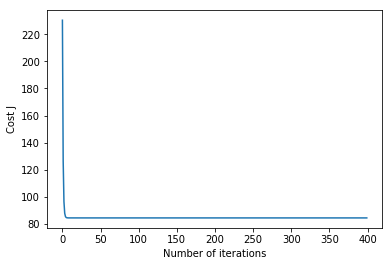

In [175]:
# Now we proceed with Gradient Descent
# NOTE : my gradient descents alpha and algorithm is set in such a way that my algorithm converges and gets to minimum value 
# in small number of iterations. If you want to see slope of the graph to check whether it gradually decreases or not
# plot graph for num_iters = no of iterations =20. You will observe details more clearly.
print('Running gradient descent ...')

# Choose some alpha value
alpha = 0.000003
num_iters = 400

# Initialize theta and execute gradient descent
theta = np.zeros(X.shape[1])
theta, J_history = gradient_descent(X, y, theta, alpha, num_iters)

# Plot the convergence graph
plt.figure()
plt.plot(np.arange(J_history.size), J_history)
plt.xlabel('Number of iterations')
plt.ylabel('Cost J')
# Display gradient descent's result
print('Theta computed from gradient descent : \n{}'.format(theta))

In [177]:
# Now we are going to use the ordinary least squares (OLS) linear regression

# re-load dataset

from sklearn.datasets import load_boston
dataset = load_boston()

X = dataset.data
y = dataset.target
m=y.size
X = np.c_[np.ones(m), X] # Add intercept term to X

theta = linearRegression_ols(X, y)

# Display normal equation's result
print('Theta computed from OLS linear regression : \n{}'.format(theta))

Theta computed from OLS linear regression : 
[ 3.64911033e+01 -1.07170557e-01  4.63952195e-02  2.08602395e-02
  2.68856140e+00 -1.77957587e+01  3.80475246e+00  7.51061703e-04
 -1.47575880e+00  3.05655038e-01 -1.23293463e-02 -9.53463555e-01
  9.39251272e-03 -5.25466633e-01]


In [184]:
'''ANSWER 3: Ordinary least square runs much much faster as compared to gradient descent for our given dataset because 
Boston dataset is a small dataset and we know that OLS works faster on smaller datasets as compared to Gradient Descent. 
Also we know that OLS has to do matrix dot products, Inverse and transpose which are computationally costly 
if we have large no of observations or large number of columns. Also the issue we might have with gradient  descent is 
it might be very very slow as per the learning rate. If learning rate is too slow, it would take much more time to converge to 
that point . Thus due to above reasons, OLS was more powerfull than gradient descent(PRIMARILY DUE TO SMALL DATASET)
'''

'ANSWER 3: Ordinary least square runs much much faster as compared to gradient descent for our given dataset because \nBoston dataset is a small dataset and we know that OLS works faster on smaller datasets as compared to Gradient Descent. \nAlso we know that OLS has to do matrix dot products, Inverse and transpose which are computationally costly \nif we have large no of observations or large number of columns. Also the issue we might have with gradient  descent is \nit might be very very slow as per the learning rate. If learning rate is too slow, it would take much more time to converge to \nthat point . Thus due to above reasons, OLS was more powerfull than gradient descent(PRIMARILY DUE TO SMALL DATASET)\n'

Now lets do gradient descent with L2-regularization (or Ridge Regression). The next 6 cells are a copy of the template that we provided above with a '_regularization' added at the end of the function name. Feel free to reuse the code that you wrote above but be sure to make the appropriate modifications to the necessary functions to add L2-regularization.

In [185]:
def feature_normalization_regularization(X):
    '''
    In this function we are going to do something similar to what we did in A0, 
    we are going to normalize all the features. Implement the following steps:
    
    - for each feature, calculate its mean
    - substract the mean from their respective feature
    - save the above result in the 'mu' variable
    
    - for each feature, calculate its standard deviation
    - divide each feature by its standard deviation
    - save the above result in the 'sigma' variable
    
    '''
    n = X.shape[1]
    X_norm = X
    mu = np.zeros(n)
    sigma = np.zeros(n)
    for i in range(0,n):
        mu[i]=X[:,i].mean()
    for i in range(0,n):
        sigma[i]=X[:,i].std()
#     Here I have used (x-mean)/sigma for calculating the X_norm. There was nothing mentioned about Xnorm , so had to do this way
    for i in range(0,n):
        X_norm[:,i]=(X[:,i]-mu[i])/sigma[i]
    
    return X_norm, mu, sigma

In [186]:
def cost_function_regularization(X, y, theta):
    '''
    In this function we are going to... you guessed it...
    Implement the cost function!
 
    '''
    lambdavalue=0.01
    cost = 0
    m = y.size
    l1=[]
    l2=[]
#     totalrows=X.shape[0]
    for i in range(0,m):
        l1.append(pow((X[i,:]*theta).sum()-y[i],2)/(m/2))
    for i in range(0,len(theta)):
        l2.append(theta.dot(theta))
    
    cost=sum(l1)+lambdavalue*sum(l2)
    return cost

In [187]:
def gradient_descent_regularization(X, y, theta, learning_rate, num_iters):
    m = y.size
    J_history = np.zeros(num_iters)
    for i in range(0, num_iters):
#       '''
#       Implement gradient descent for a single gradient step on the parameter 
#       vector theta. Save the result of each iteration on J_history.
#       '''
        lenoftheta=len(theta)
        pred=X.dot(theta)
        for r in range(lenoftheta):
            temp=X[:,r]
            temp.shape=(m,1)
            differentiation=2*(pred-y)*temp
            theta[r]= theta[r]-learning_rate*differentiation.sum() + 2*lambdavalue*theta[r]
        J_history[i] = cost_function_regularization(X, y, theta)

    return theta, J_history

In [188]:
# load dataset

from sklearn.datasets import load_boston
dataset = load_boston()
X = dataset.data
y = dataset.target
m = y.size

In [189]:
# Normalize features
print('Normalizing Features ...')
lambdavalue=0.01
X, mu, sigma = feature_normalization_regularization(X)
X = np.c_[np.ones(m), X]  # Add a column of ones to X

Normalizing Features ...


Running gradient descent ...
Theta computed from gradient descent : 
[ 2.28300305e+01  4.74593727e-12  6.93241192e-13  8.41980242e-12
 -8.74688737e-13  7.82698132e-12 -7.29715920e-13  3.49293514e-12
  1.89309574e-12 -2.78110344e-12 -8.15301578e-12  6.39355119e-12
 -9.37217795e-13  4.82958546e-12]


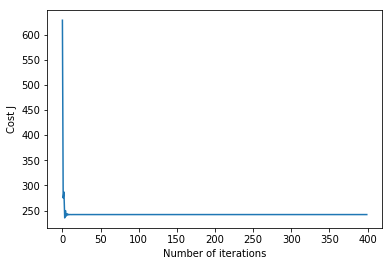

In [190]:
# Now we proceed with Gradient Descent

print('Running gradient descent ...')

# Choose some alpha value
alpha = 0.000003
num_iters = 400

# Initialize theta and execute gradient descent
theta = np.zeros(X.shape[1])
theta, J_history = gradient_descent_regularization(X, y, theta, alpha, num_iters)

# Plot the convergence graph
plt.figure()
plt.plot(np.arange(J_history.size), J_history)
plt.xlabel('Number of iterations')
plt.ylabel('Cost J')

# Display gradient descent's result

print('Theta computed from gradient descent : \n{}'.format(theta))

## Question 3: Guess the function (25 points)

Consider three datasets provided with this notebook, namely `data1.csv` and `data2.csv`. Each dataset has 1000 samples. Every sample has 5 features $x_1, x_2, \ldots, x_5$ and a target variable $y$. In each of the datasets, the target variable has been generated from the features of a different unknown function $y$. In general, $$y=f(\mathbf{x})=\sum_{j} w_j \prod_{i=1}^5 x_i^{k_{i;j}}$$ where $x_i$ is the $i^{\text {th}}$ feature and $j$ denotes a particular term in the polynomial and $k_{i;j}$ is the power of the $i^{\text{th}}$ feature in the $j^{\text{th}}$ term. It can be any whole number from $0$ to $3$.

Thus $y_1=f_1(\mathbf{x})$;  $y_2=f_2(\mathbf{x})$ and $y_3=f_3(\mathbf{x})$.

1. Find both the unknown target functions using the given datasets. Use the dedicated cells defined below to write the corresponding methodology and code.
2. Define all your variables such that when we run the corresponding code cell, it should nicely print the correct output which supports your methodology and also prints the right answer.

#### Hints:
1. Rounding off will make things easy and we encourage it. For instance, you can write 2.98 as 3!

### Methodology and answer for function 1

In [191]:
## Code for function 1## Code for function 1

# APPROACH: My approach to solve first one is just by the use of gradient descent. 
# I have used all functions we implemented in question 2

import pandas as pd
df=pd.read_csv("data1.csv",header=None)
X=df.iloc[:,:-1]
y=df.iloc[:,-1]
ylist=y.values.tolist()
xlist=X.values.tolist()

Normalizing Features ...
Running gradient descent ...
Theta computed from gradient descent : 
[ 3.14332094e+00 -7.67402445e-01 -1.94262844e+00 -4.85397567e+00
  1.05021102e+00  1.11582375e-03]


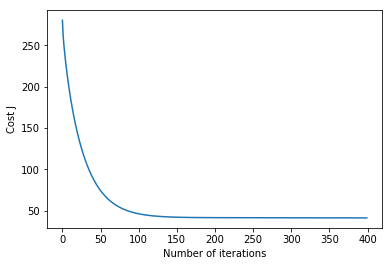

In [193]:
def feature_normalization_regularization(X):
    n = X.shape[1]
    X_norm = X
    for i in range(0,n):
        X_norm[:,i]=(X[:,i]-mu[i])/sigma[i]
    return X_norm
def cost_function_regularization(X, y, theta):
    lambdavalue=0.01
    cost = 0
    m = y.size
    l1=[]
    l2=[]
    for i in range(0,m):
        l1.append(pow((X[i,:]*theta).sum()-y[i],2)/(m/2))
    for i in range(0,len(theta)):
        l2.append(theta.dot(theta))   
    cost=sum(l1)+lambdavalue*sum(l2)
    return cost

def gradient_descent_regularization(X, y, theta, learning_rate, num_iters):
    m = y.size
#     print("m size is here : ",m)
    J_history = np.zeros(num_iters)
#     print(len(J_history))
    for i in range(0, num_iters):
        lenoftheta=len(theta)
#         print("length of theta is here :",lenoftheta)
        pred=X.dot(theta)
#         print("prediciton : ",pred)
#         print(len(pred))
        for r in range(lenoftheta):
            temp=X[:,r]
#             print(temp)
            temp.shape=(m,1)
#             print(temp)
            differentiation=2*(pred-y).dot(temp)
#             print("shape of differentiation : ",differentiation)
            theta[r]= theta[r]-learning_rate*differentiation.sum() + 2*lambdavalue*theta[r]
#             print("shape of theta[r] ",theta[r])
#             print("theta[r] is : ",theta[r])
        J_history[i] = cost_function_regularization(X, y, theta)

    return theta, J_history
# Normalize features
print('Normalizing Features ...')
lambdavalue=0.0001
m=y.size
# print(y.size)
X=np.array(xlist)
X = feature_normalization_regularization(X)
X = np.c_[np.ones(m), X]  # Add a column of ones to X
# print(X)
# print(X.shape)
print('Running gradient descent ...')

# Choose some alpha value
alpha = 0.000003
num_iters = 400

# Initialize theta and execute gradient descent
theta = np.zeros(X.shape[1])
# print("Here is shape",X.shape[1])
# print(theta)
# print(type(theta))
theta, J_history = gradient_descent_regularization(X, y, theta, alpha, num_iters)

# Plot the convergence graph
plt.figure()
plt.plot(np.arange(J_history.size), J_history)
plt.xlabel('Number of iterations')
plt.ylabel('Cost J')

# Display gradient descent's result

print('Theta computed from gradient descent : \n{}'.format(theta))

### Methodology and answer for function 2

In [194]:
## Code for function 2


# METHODOLOGY  : Use sklearn.preprocessing ---> PolynomialFeatures , so that we can generate almost all polynomials equally upto 
# certain limit of total (15 here). 



# """FAILED"""  Methodology (Just for knowledge ) : First find all possible combinations of x1^(0,1,2,3)* x2^(0,1,2,3)* x3^(0,1,2,3)* x4^(0,1,2,3)* x5^(0,1,2,3)
# now all these cases can be found by using itertools.combination([X1^k , X2^k , X3^k , X4^k , X5^k]) where k ranges 
#  from 0 to 3 for each and every values of X individually. 
# Now when I started implementing this, it was not infinite loop, but it took so much time that it hanged my jupyter notebook 
# and corrupted my file. It was like 9,00,000 iterations that it went into.Dont know why and how till now!! So had to come 
# with another better approach !!!

In [198]:
# Load the csv file into df and some usefull variables are initialized.
import pandas as pd
df=pd.read_csv("data2.csv",header=None)
X=df.iloc[:,:-1]
y=df.iloc[:,-1]
x1col=df.iloc[:,0]
ylist=y.values.tolist()
xlist=X.values.tolist()
# xlist
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
X =np.array(xlist)
X

array([[ 0.45  , -0.2038,  2.1661, -1.3286, -1.3226],
       [ 1.4311, -1.1823, -0.322 , -0.1791,  0.7288],
       [-1.1278,  0.3957, -1.1105, -0.1856, -0.6614],
       ...,
       [ 0.9111, -0.313 ,  0.5424,  0.3638,  1.276 ],
       [-0.1613,  0.1113,  1.0658,  0.232 ,  1.1472],
       [-0.6831,  0.954 ,  1.1857,  1.8047, -0.779 ]])

In [209]:
# Generated all possible vaules untill
poly = PolynomialFeatures(degree=15)
# Generating all values that has total maximum power of 15 and all less powers are counted in it with different proportion 
# of different X. example : 1, x^2, X1^2*X2^1 , etc.... So it was a perfect fit function
polyfit=poly.fit_transform(X)
polyfit

array([[ 1.00000000e+00,  4.50000000e-01, -2.03800000e-01, ...,
        -6.68896980e+01, -6.65876220e+01, -6.62869101e+01],
       [ 1.00000000e+00,  1.43110000e+00, -1.18230000e+00, ...,
         5.24928199e-04, -2.13605623e-03,  8.69211492e-03],
       [ 1.00000000e+00, -1.12780000e+00,  3.95700000e-01, ...,
        -1.59657903e-04, -5.68953325e-04, -2.02750932e-03],
       ...,
       [ 1.00000000e+00,  9.11100000e-01, -3.13000000e-01, ...,
         3.14618428e+00,  1.10349949e+01,  3.87043801e+01],
       [ 1.00000000e+00, -1.61300000e-01,  1.11300000e-01, ...,
         3.20837237e-01,  1.58648482e+00,  7.84489391e+00],
       [ 1.00000000e+00, -6.83100000e-01,  9.54000000e-01, ...,
        -1.26705943e-01,  5.46927078e-02, -2.36081451e-02]])

In [210]:
w=np.zeros(1)*polyfit[1]
from numpy.linalg import inv
theta = np.zeros((polyfit.shape[1], 1))
# print(theta)
# print(theta.size)
theta=(inv(polyfit.transpose().dot(polyfit))).dot(polyfit.transpose().dot(ylist))

theta

#WAIT FOR THE CODE TO RUN : IT GIVES CORRECT VALUES IN NEARLY MAXIMUM 2 MINUTES .

array([-3.15649250e+05,  3.82985938e+04, -5.86148906e+04, ...,
        6.65855408e-03, -9.25207138e-03, -3.46541405e-04])